Task 1: Patient Demographics Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Import and clean data
df = pd.read_csv('updated-hosital-data.csv')


In [3]:
# Handle missing values (fill missing patient_sat_score with column mean)
df['patient_sat_score'].fillna(df['patient_sat_score'].mean(), inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)


In [4]:
# 2. Group data by gender, race, and age categories
# Create age categories
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
df['age_category'] = pd.cut(df['patient_age'], bins=bins, labels=labels)

# Group by gender and race
gender_distribution = df['patient_gender'].value_counts()
race_distribution = df['patient_race'].value_counts()


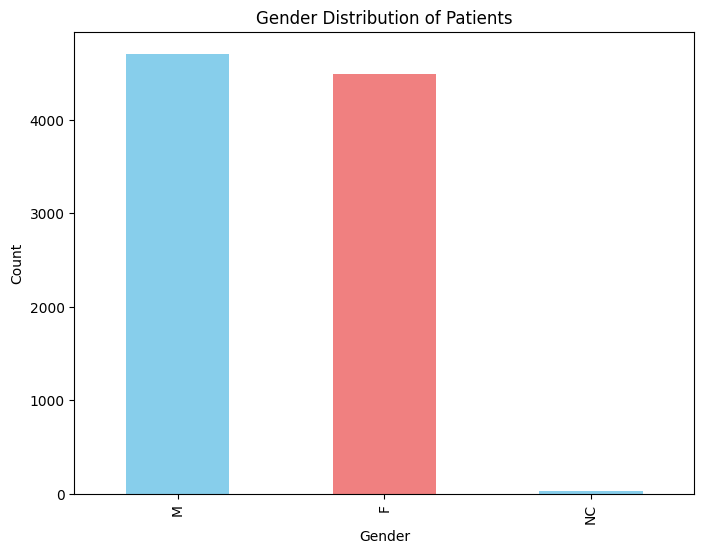

In [5]:
# 3. Create visualizations

# Bar chart for gender distribution
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

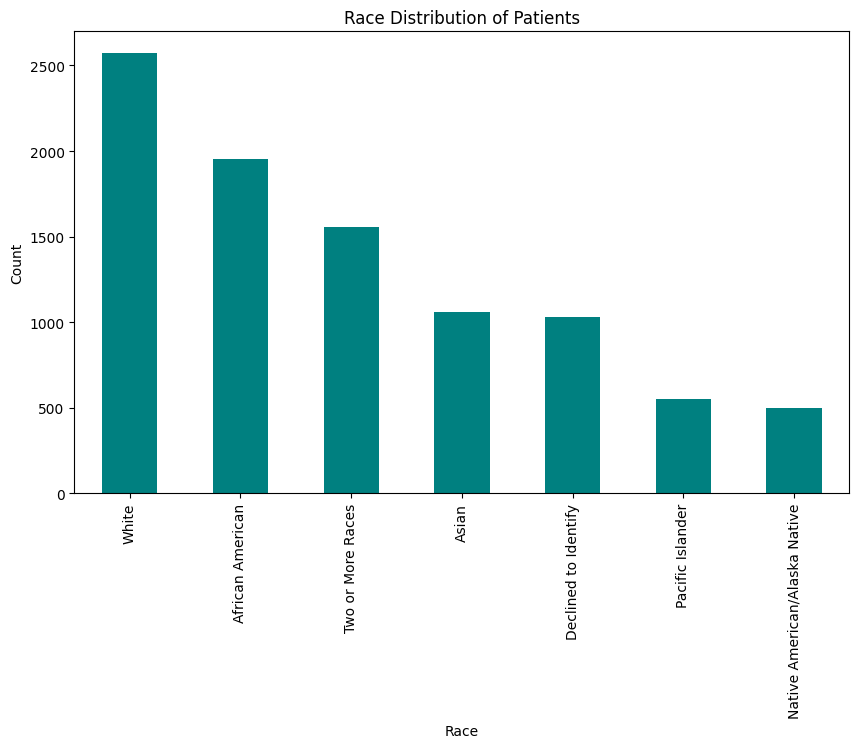

In [6]:
# Bar chart for race distribution
plt.figure(figsize=(10, 6))
race_distribution.plot(kind='bar', color='teal')
plt.title('Race Distribution of Patients')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

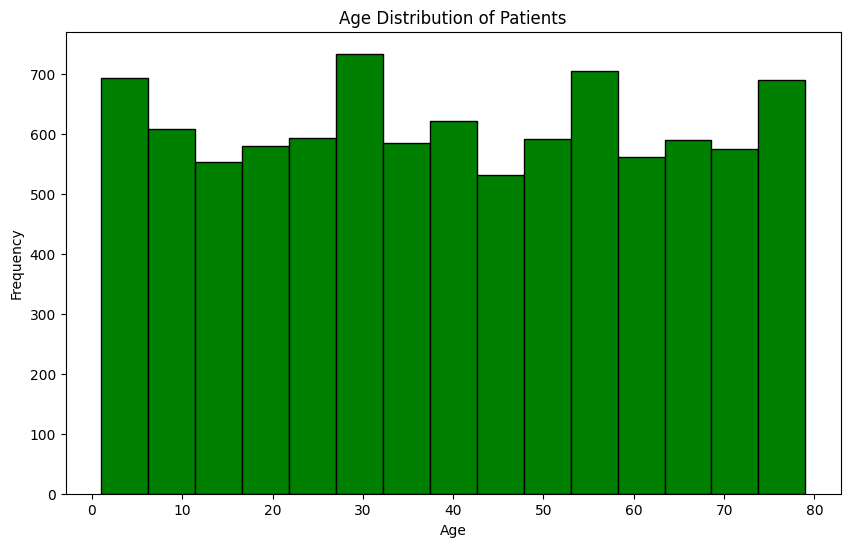

In [7]:
# Histogram for age distribution
plt.figure(figsize=(10, 6))
df['patient_age'].plot(kind='hist', bins=15, color='green', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Amal\AppData\Local\Temp\ipykernel_28204\2346270710.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_distribution = df.groupby(['age_category', 'patient_gender']).size().unstack()


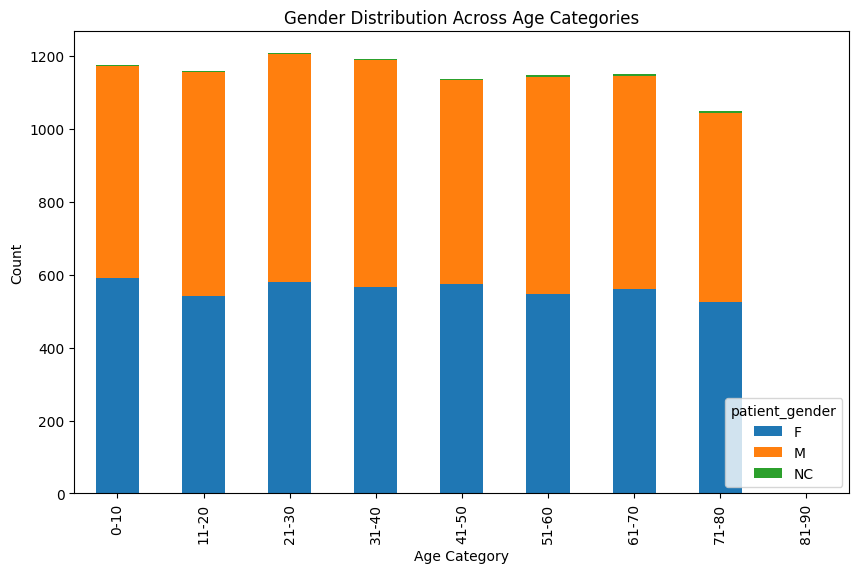

In [8]:
# 4. Demographic Trends
# Gender distribution across age categories
gender_age_distribution = df.groupby(['age_category', 'patient_gender']).size().unstack()
gender_age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()




C:\Users\Amal\AppData\Local\Temp\ipykernel_28204\3564700279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  race_age_distribution = df.groupby(['age_category', 'patient_race']).size().unstack()


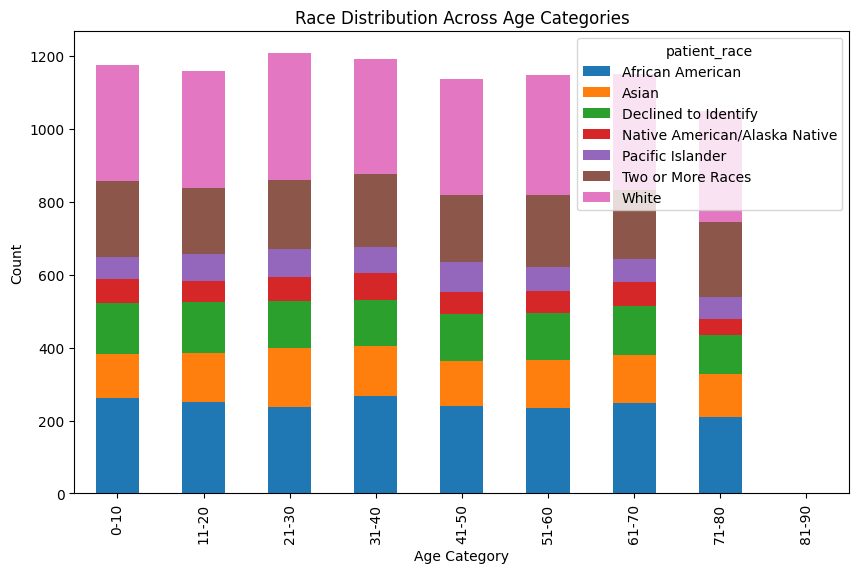

In [9]:
# Race vs age distribution
race_age_distribution = df.groupby(['age_category', 'patient_race']).size().unstack()
race_age_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Race Distribution Across Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()



In [10]:
# Satisfaction score analysis
satisfaction_by_gender = df.groupby('patient_gender')['patient_sat_score'].mean()
satisfaction_by_race = df.groupby('patient_race')['patient_sat_score'].mean()


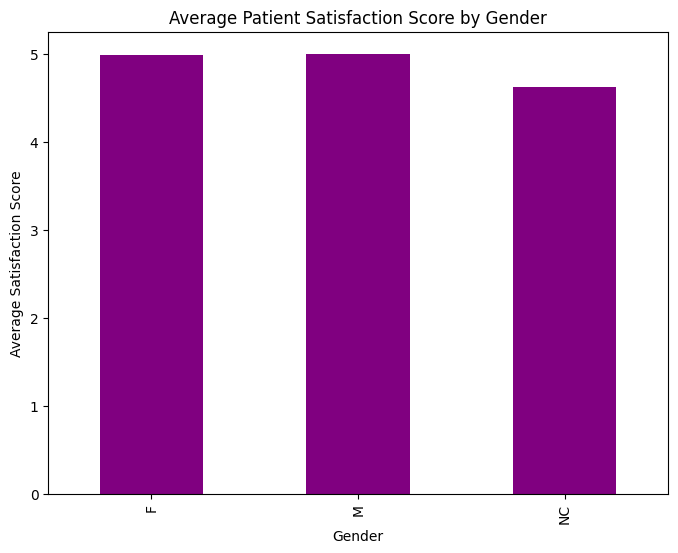

In [11]:

# Plot satisfaction score by gender
plt.figure(figsize=(8, 6))
satisfaction_by_gender.plot(kind='bar', color='purple')
plt.title('Average Patient Satisfaction Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Satisfaction Score')
plt.show()



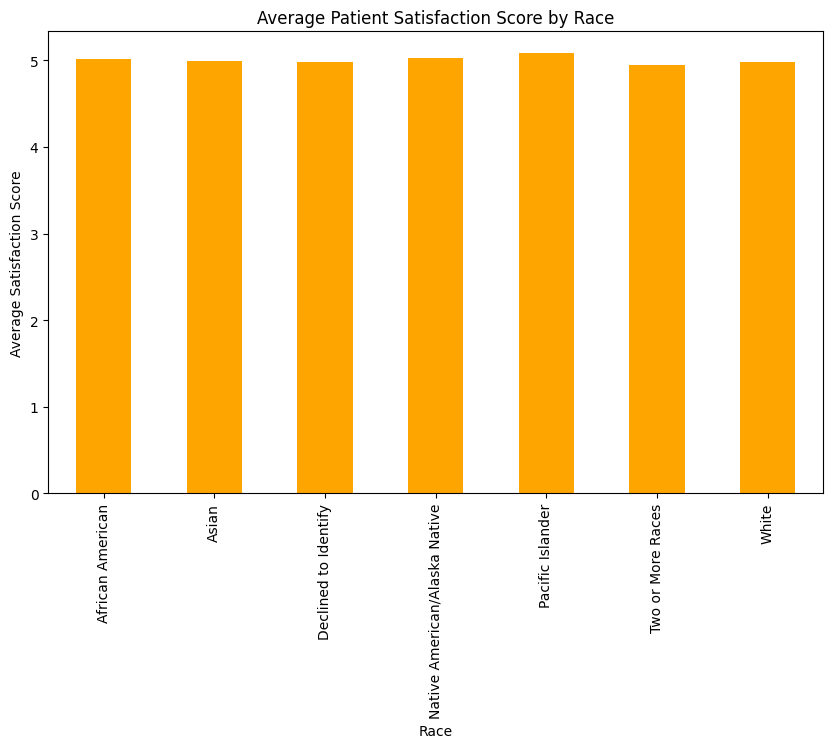

In [12]:
# Plot satisfaction score by race
plt.figure(figsize=(10, 6))
satisfaction_by_race.plot(kind='bar', color='orange')
plt.title('Average Patient Satisfaction Score by Race')
plt.xlabel('Race')
plt.ylabel('Average Satisfaction Score')
plt.show()

In [13]:
# 5. Save the cleaned data into a new CSV file
df.to_csv('cleaned_patient_data.csv', index=False)

 Task 2: Hospital Admission Trends

In [14]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display first few rows to verify the changes
print(df.head())

                 date   patient_id patient_gender  patient_age  \
0 2020-03-20 08:47:01  145-39-5406              M           69   
1 2020-06-15 11:29:36  316-34-3057              M            4   
2 2020-06-20 09:13:13  897-46-3852              F           56   
3 2020-02-04 22:34:29  358-31-9711              F           24   
4 2020-09-04 17:48:27  289-26-0537              M            5   

   patient_sat_score patient_first_inital patient_last_name  \
0          10.000000                    H         Glasspool   
1           4.992054                    X           Methuen   
2           9.000000                    P         Schubuser   
3           8.000000                    U          Titcombe   
4           4.992054                    Y       Gionettitti   

                    patient_race  patient_admin_flag  patient_waittime  \
0                          White               False                39   
1  Native American/Alaska Native                True                27   
2 

In [15]:
# Group data by day to count admissions per day
admissions_per_day = df.groupby(df['date'].dt.date).size()

# Group data by week to count admissions per week
admissions_per_week = df.groupby(df['date'].dt.to_period('W')).size()

# Group data by month to count admissions per month
admissions_per_month = df.groupby(df['date'].dt.to_period('M')).size()


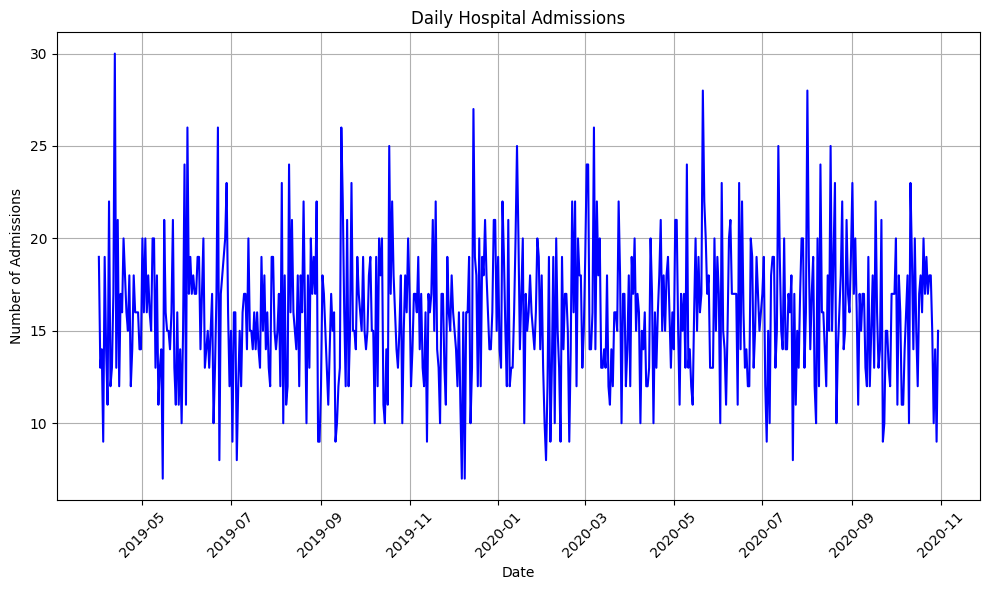

In [16]:
# Daily Admission Plot
plt.figure(figsize=(10, 6))
admissions_per_day.plot(kind='line', color='blue')
plt.title('Daily Hospital Admissions')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


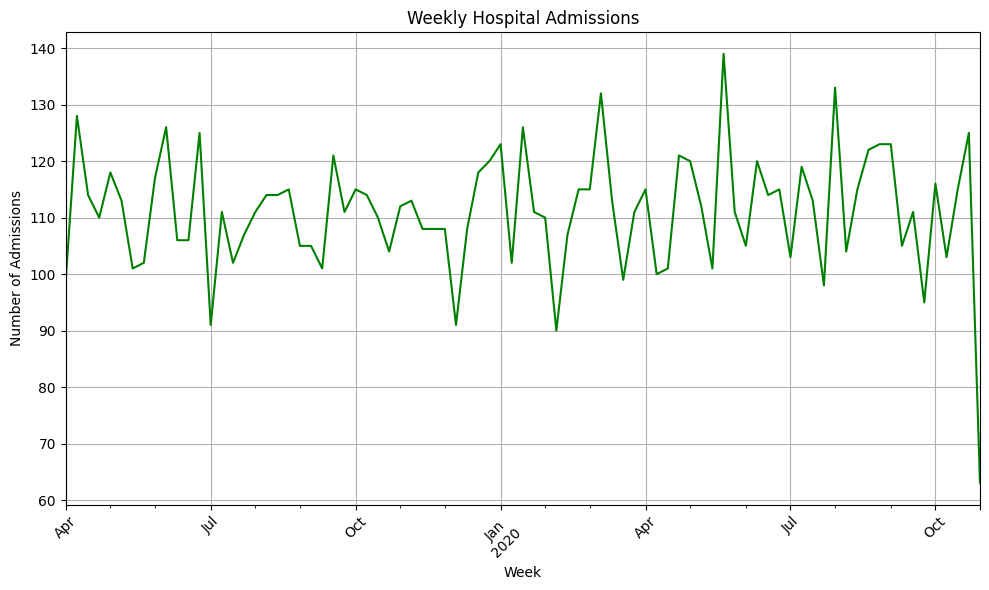

In [17]:
# Weekly Admission Trends
plt.figure(figsize=(10, 6))
admissions_per_week.plot(kind='line', color='green')
plt.title('Weekly Hospital Admissions')
plt.xlabel('Week')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


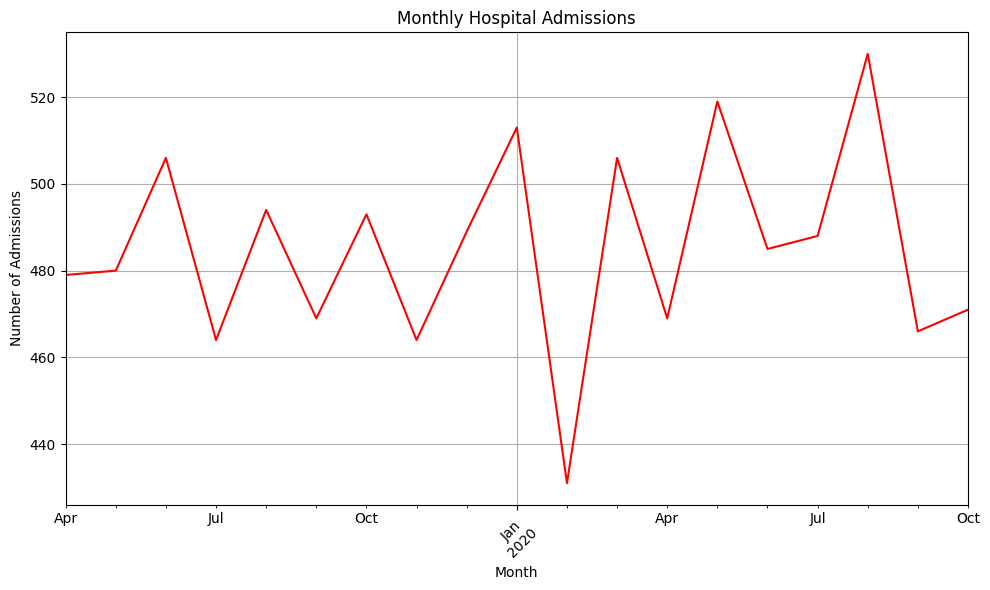

In [18]:
# Monthly Admission Trends
plt.figure(figsize=(10, 6))
admissions_per_month.plot(kind='line', color='red')
plt.title('Monthly Hospital Admissions')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Report on admission patterns and peak times.
1. Daily Hospital Admissions:
* Pattern: Variation in daily ddmissions from around 10 to 30 admissions per day. No apparent daily pattern and has a random nature to it.

* Peak Periods: Some spikes happen throughout the year, mainly around May 2019 and August 2020 hitting the highest points. These points may be related to holidays or sudden health event.

2. Weekly Hospital Admissions:
* Pattern: Grouping by week shows some clearer patterns ranging between 90 and 140 admissions per week. The pattern is less than the day-to-day pattern in variation. No apparent seasonal or holiday pattern but periods of stable admissions followed by slight increases and decreases can be noticed.

* Peak Periods: Weekly peaks occur near April, June, and October. This is almost close to a quarterly pattern of higher hospital admissions, suggesting seasonal changes can increase admission rates.

3. Monthly Hospital Admissions:
* Pattern: A Variation from around 450 to 520 admissions can be noticed.

* Peak Periods: The highest peaks are reached in May and August in both years which confirms the seasonal trend that admissions rise in Winter and summer.
Also January 2020 eperienced a noticable drop which could indicate some external event or some health measures or even an issue in resource management in the hospital.